# *Assignment 3 Data Integration*

Combining data from different sources and providing unified view of these data.
### Categories of data used:  
> - <b>Realstate json and xml data 
> - Hospital json data  
> - Shopping Centers xls data  
> - Super Markets html data  
> - GTFS data  
> - Victoria Shape files

### Loading Libraries

In [1]:
#Basic scientific python libs
import pandas as pd
import numpy as np
# Visualisation
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
# Regular Expression
import re
# Dates
from datetime import datetime
import datetime
from datetime import timedelta
import time
## Shape files
import numpy
import matplotlib 
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import math
###
from shapely.geometry import Point, Polygon

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import linear_model
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
print('Libraries Loaded')

Libraries Loaded


## Task 1: Data Integration

### Task 1.1: Read Realstate data.

In [2]:
# Read hospital json file
hospital = pd.read_json('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/29421934_hospitals.json')

# Read realstate json file
realstatejson = pd.read_json('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/29421934_real_state.json')

# Read shopping centers xls file
shoppingcenters = pd.read_excel('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/29421934_shopingcenters.xlsx')

# Read supermarkets html file
supermarkets = pd.read_html('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/29421934_supermarkets.html')
supermarkets=supermarkets[0]
supermarkets = supermarkets.drop('Unnamed: 0', 1)

# Reading realstate xml file
import xml.etree.cElementTree as et
 
tree = et.ElementTree(file = '/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/29421934_real_state.xml')
root = tree.getroot()

xml_dict = {}
for child_of_root in root:
    xml_dict[child_of_root.tag] =[child.text for child in child_of_root]
    
realstatexml = pd.DataFrame(xml_dict)
print('Realstate data successfully loaded')

Realstate data successfully loaded


##### Realstate JSON Data

In [3]:
realstatejson.head()

realstatejson.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 10 columns):
addr_street      1007 non-null object
bathrooms        1007 non-null float64
bedrooms         1007 non-null float64
lat              1007 non-null float64
lng              1007 non-null float64
parking_space    1007 non-null float64
price            1007 non-null float64
property_id      1007 non-null float64
property_type    1007 non-null object
year             1007 non-null float64
dtypes: float64(8), object(2)
memory usage: 86.8+ KB


In [4]:
# Null check
realstatejson.isnull().sum()


addr_street      3
bathrooms        3
bedrooms         3
lat              3
lng              3
parking_space    3
price            3
property_id      3
property_type    3
year             3
dtype: int64

<div class="alert alert-block alert-danger">
Null Values are present in Realstate JSON Data
</div>

In [5]:
### Drop Null Values
realstatejson[realstatejson.property_id.isnull()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
176,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
505,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
628,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [6]:
# Duplicate check
realstatejson.loc[realstatejson.duplicated, :].count()

addr_street      5
bathrooms        5
bedrooms         5
lat              5
lng              5
parking_space    5
price            5
property_id      5
property_type    5
year             5
dtype: int64

<div class="alert alert-block alert-danger">
Duplicate values are present in Realstate JSON Data
</div>

In [7]:
# Dropping Null values
realstatejson = realstatejson[pd.notnull(realstatejson.property_id)]

# Drop duplicates
realstatejson.drop_duplicates(keep='first', inplace=True)
print('Duplicates and Null values dropped successfully')

Duplicates and Null values dropped successfully


In [8]:
# convert data types
realstatejson.bathrooms = realstatejson.bathrooms.astype(int)
realstatejson.bedrooms = realstatejson.bedrooms.astype(int)
realstatejson.parking_space = realstatejson.parking_space.astype(int)
realstatejson.property_id = realstatejson.property_id.astype(object)
realstatejson.year = realstatejson.year.astype(object)
print('Done!!')


Done!!


##### Realstate XML Data

In [9]:
realstatexml.head()

realstatexml.info()

realstatexml.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
addr_street      1002 non-null object
bathrooms        1002 non-null object
bedrooms         1002 non-null object
lat              1002 non-null object
lng              1002 non-null object
parking_space    1002 non-null object
price            1002 non-null object
property_id      1002 non-null object
property_type    1002 non-null object
year             1002 non-null object
dtypes: object(10)
memory usage: 78.4+ KB


,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
count,1002,1002,1002,1002,1002,1002,1002,1002,1002,1002
unique,996,4,6,997,995,5,779,997,2,12
top,nan,1.0,3.0,nan,nan,2.0,6480000.0,nan,house,2015.0
freq,6,488,549,6,6,519,6,6,996,146


In [10]:
# Duplicate check
realstatexml.loc[realstatexml.duplicated, :].count()

addr_street      5
bathrooms        5
bedrooms         5
lat              5
lng              5
parking_space    5
price            5
property_id      5
property_type    5
year             5
dtype: int64

<div class="alert alert-block alert-danger">
Duplicate values are present in Realstate XML Data
</div>

In [11]:
# Drop duplicates
realstatexml.drop_duplicates(keep='first', inplace=True)

In [12]:
# Replace nan with np.NaN
realstatexml = realstatexml.replace('nan', np.NaN) 

In [13]:
# Null check
realstatexml.isnull().sum()

addr_street      1
bathrooms        1
bedrooms         1
lat              1
lng              1
parking_space    1
price            1
property_id      1
property_type    1
year             1
dtype: int64

<div class="alert alert-block alert-danger">
Null values are present in Realstate XML Data.
</div>

In [14]:
# remove null values
realstatexml = realstatexml[pd.notnull(realstatexml.property_id)]

In [15]:
#Data type conversions
realstatexml.bathrooms = pd.to_numeric(realstatexml.bathrooms)
realstatexml.bathrooms  = realstatexml.bathrooms.astype(int)
realstatexml.bedrooms = pd.to_numeric(realstatexml.bedrooms)
realstatexml.bedrooms  = realstatexml.bedrooms.astype(int)
realstatexml.parking_space = pd.to_numeric(realstatexml.parking_space)
realstatexml.parking_space  = realstatexml.parking_space.astype(int)
realstatexml.lat = pd.to_numeric(realstatexml.lat)
realstatexml.lng = pd.to_numeric(realstatexml.lng)
realstatexml.price = pd.to_numeric(realstatexml.price)
print('done')

done


#### Realstate XML + JSON

In [16]:
realstate = pd.concat([realstatejson,realstatexml])
print('done')

done


## Task 1.2: Load Melbourne Train Information Data

##### Loading GTFS Data.

In [17]:
agency = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/agency.txt')
calendar_dates = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar_dates.txt')
calendar = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar.txt')
routes = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/routes.txt')
shapes = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/shapes.txt')
stop_times = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stop_times.txt')
stops = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stops.txt')
trips = pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/trips.txt')
print('GTFS Data successfully loaded')

GTFS Data successfully loaded


<div class="alert alert-block alert-warning">
Upon observation we found out that, for few rows arrival and departure time are in wrong format.  
</div>

In [18]:
# Define function to correct arrival and departure time.
def fix_time(time_str):
    h, m, s = time_str.split(':')
    if int(h) >=24:
        return str('00:'+m+':'+s)
    else:
        return str(h+':'+m+':'+s)

stop_times['arrival_time'] = stop_times['arrival_time'].apply(lambda x: fix_time(x))
stop_times['departure_time'] = stop_times['departure_time'].apply(lambda x: fix_time(x))
stop_times['arrival_time'] = pd.to_datetime(stop_times['arrival_time'], format='%H:%M:%S')
stop_times['departure_time'] = pd.to_datetime(stop_times['departure_time'], format='%H:%M:%S')
print('Stop times fixes')

Stop times fixes


#### Filter stop times and trips data

Filtering trains running on weekdays between 7 AM to 9 AM

In [19]:
# Filtering stop times and trips
# stop times between 7am to 9am
filtered_stop_times = stop_times[stop_times.arrival_time.dt.strftime('%H:%M:%S').between('07:00:00','09:00:00')]


#filtering trips running on weekdays
filtered_trips = trips[trips['service_id']=='T0']



# Merge filtered trip and stop times.
filtered_trip_times = pd.merge(filtered_trips,filtered_stop_times, on='trip_id', how='inner')
print('Dataframe subsets successfully created')

Dataframe subsets successfully created


In [20]:
# Convert Datetime to time only format
filtered_trip_times['arrival_time'] = filtered_trip_times['arrival_time'].dt.time
filtered_trip_times['departure_time'] = filtered_trip_times['departure_time'].dt.time
print('Datetime to time done!!')

Datetime to time done!!


## Task 1.3: Load Shape file Data.

In [21]:
geo_data = gpd.read_file("/Users/shubhank/MonashUniversity/sem2/wrangling/assignment3/vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.dbf")
print('Geo data successfully loaded!!')

Geo data successfully loaded!!


## Task 1.4: Data Integration

#### Calculate closest SuperMarket to Property

In [22]:
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)   

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    meters = 6378 * c * 1000
    return meters
print('done')

done


In [23]:
# # The Euclidean distance from the closest super market to the property
# code run for 5 mins

distsmkt = {}
temp_list = []
for i in range(len(realstate)):
    x1 = realstate.iloc[i]['lat']
    y1 = realstate.iloc[i]['lng']
    propertyid = realstate.iloc[i]['property_id']
    for j in range(len(supermarkets)):
        x2 = supermarkets.iloc[j]['lat']
        y2 = supermarkets.iloc[j]['lng']
        temp_list.append([haversine_distance(x1,y1,x2,y2),supermarkets.iloc[j]['id']])
    distsmkt[propertyid] = min(temp_list)
    temp_list = []
    
rstate_smkt = pd.DataFrame(columns=['property_id','Distance_to_supermarket','Supermarket_id'])
for key, value in distsmkt.items():
    rows = [key,value[0],value[1]]
    rstate_smkt.loc[len(rstate_smkt)] = rows

# merge to dataframe
realstate = pd.merge(realstate, rstate_smkt, on='property_id', how='inner')
print('Closest SuperMarket Found!!')

Closest SuperMarket Found!!


#### Calculate closest Hospital to the property

In [24]:
# The Euclidean distance from the closest hospital to the property.
distH = {}
temp_list = []
for i in range(len(realstate)):
    x1 = realstate.iloc[i]['lat']
    y1 = realstate.iloc[i]['lng']
    propertyid = realstate.iloc[i]['property_id']
    for j in range(len(hospital)):
        x2 = hospital.iloc[j]['lat']
        y2 = hospital.iloc[j]['lng']
        temp_list.append([haversine_distance(x1,y1,x2,y2),hospital.iloc[j]['id']])
    #print(len(temp_list))
    distH[propertyid] = min(temp_list)
    temp_list = []
    
rstate_hsptl = pd.DataFrame(columns=['property_id','Distance_to_hospital','Hospital_id'])
for key, value in distH.items():
    rows = [key,value[0],value[1]]
    rstate_hsptl.loc[len(rstate_hsptl)] = rows

# Merge to dataframe
realstate = pd.merge(realstate, rstate_hsptl, on='property_id', how='inner')
print('Closest Hospital Found!!!')

Closest Hospital Found!!!


##### Calculate closest Shopping Center to property

In [25]:
# The closest shopping center to the property.
# The Euclidean distance from the closest shopping center to the property
distSS = {}
temp_list = []
for i in range(len(realstate)):
    x1 = realstate.iloc[i]['lat']
    y1 = realstate.iloc[i]['lng']
    propertyid = realstate.iloc[i]['property_id']
    for j in range(len(shoppingcenters)):
        x2 = shoppingcenters.iloc[j]['lat']
        y2 = shoppingcenters.iloc[j]['lng']
        temp_list.append([haversine_distance(x1,y1,x2,y2),shoppingcenters.iloc[j]['sc_id']])
    #print(len(temp_list))
    distSS[propertyid] = min(temp_list)
    temp_list = []
    
rstate_ss = pd.DataFrame(columns=['property_id','Distance_to_sc','Shopping_center_id'])

for key, value in distSS.items():
    rows = [key,value[0],value[1]]
    rstate_ss.loc[len(rstate_ss)] = rows

realstate = pd.merge(realstate, rstate_ss, on='property_id', how='inner')
print('Closest Shopping Center Found!!!')

Closest Shopping Center Found!!!


#### Calculate closest train station to the property

In [26]:
#The closest train station to the property
# The Euclidean distance from the closest train station to the property.
distStatn = {}
temp_list = []
for i in range(len(realstate)):
    x1 = realstate.iloc[i]['lat']
    y1 = realstate.iloc[i]['lng']
    propertyid = realstate.iloc[i]['property_id']
    for j in range(len(stops)):
        x2 = stops.iloc[j]['stop_lat']
        y2 = stops.iloc[j]['stop_lon']
        temp_list.append([haversine_distance(x1,y1,x2,y2),stops.iloc[j]['stop_id']])
    #print(len(temp_list))
    distStatn[propertyid] = min(temp_list)
    temp_list = []
    
rstate_statn = pd.DataFrame(columns=['property_id','Distance_to_train_station','Train_station_id'])

for key, value in distStatn.items():
    rows = [key,value[0],value[1]]
    rstate_statn.loc[len(rstate_statn)] = rows


realstate = pd.merge(realstate, rstate_statn, on='property_id', how='inner')
print('Closest Train Station Found!!!')

Closest Train Station Found!!!


#### Calculate Travel time to CBD

In [27]:
def get_minutes(time_str):
    h, m, s = time_str.split(':')
    return int(h)*60 + int(m)+ int(s)/60

FMT = '%H:%M:%S'

regular = re.compile(r'(\d{2}:\d{2}:\d{2})')


# calculate distance to CBD
def distance_to_cbd(stop_id):
    trips_id_list = filtered_trip_times[(filtered_trip_times['stop_id']==stop_id) ].groupby('trip_id')['trip_id'].unique()
    if len(trips_id_list) == 0:
        return 0
    else:
        trips = []  
        for trip_id in trips_id_list:
            for trip in trip_id:
                trips.append(trip)

        trip_to_CBD=[]
        time_taken = []
        for trip in trips:
            #print(time_taken)
            tripDF = filtered_trip_times[filtered_trip_times['trip_id']==trip]
            #time_taken=[]
            if len(tripDF[tripDF['stop_id']==19854])==1:
    
                a = tripDF[tripDF.stop_id == stop_id]['arrival_time'].to_string()
                a =regular.search(a).group(1)
                b = tripDF[tripDF.stop_id == 19854]['arrival_time'].to_string()
                b =regular.search(b).group(1)
                c = datetime.datetime.strptime(b, FMT) - datetime.datetime.strptime(a, FMT)
                if c.days>=0:
                    time = get_minutes(str(c))
                    time_taken.append(time)
                    #print(time_taken)
        if len(time_taken)>0:
            final_time = sum(time_taken)/len(time_taken)
            return final_time
        else:
            return 0



In [28]:
realstate.Train_station_id = realstate.Train_station_id.astype('int')

realstate['travel_min_to_CBD'] = realstate['Train_station_id'].apply(lambda x: distance_to_cbd(x))
print('Travel time to CBD calculated.')

Travel time to CBD calculated.


#### Calculate Transfer Flag

In [29]:
# check if there is direct trip to CBD

def direct_trip_to_cbd(stop_id):
    trips_id_list = filtered_trip_times[(filtered_trip_times['stop_id']==stop_id) ].groupby('trip_id')['trip_id'].unique()
    count = 0
    if len(trips_id_list) == 0:
        return 1
    else:
        trips = []  
        for trip_id in trips_id_list:
            for trip in trip_id:
                trips.append(trip)

        trip_to_CBD=[]
        time_taken = []
        for trip in trips:
            tripDF = filtered_trip_times[filtered_trip_times['trip_id']==trip]
            # check if flinders station is in route.
            if len(tripDF[tripDF['stop_id']==19854])==1:
                count +=1
        if count >0:
            return 0
        else:
            return 1    


In [30]:
#direct_trip_to_cbd
realstate['Transfer_flag'] = realstate['Train_station_id'].apply(lambda x: direct_trip_to_cbd(x))
print('Transfer flag calculated successfully.')


Transfer flag calculated successfully.


In [31]:
# Change order of columns
realstate = realstate.rename(columns={'property_id': 'Property_id', 'Distance_to_supermarket': 'Distance_to_supermaket'})
realstate = realstate[['Property_id','lat','lng','addr_street','price','property_type'
           ,'year','bedrooms','bathrooms','parking_space','Shopping_center_id','Distance_to_sc'
          ,'Train_station_id','Distance_to_train_station','travel_min_to_CBD','Transfer_flag'
        ,'Hospital_id','Distance_to_hospital','Supermarket_id'
          ,'Distance_to_supermaket']]
print('done')

done


#### Find Suburb

In [32]:
# Function to find suburb
def find_suburb(x):
    p1 = x[1]
    p2 = x[2]
    property_point = Point(p2,p1)
    for j in range(len(geo_data['geometry'])):
        poly = geo_data['geometry'][j]
        if property_point.within(poly):
            return geo_data['VIC_LOCA_2'][j]
        else:
            "not available"

In [33]:
realstate['suburb'] = realstate.apply(find_suburb,axis=1)
print('Suburb Found!!!')

Suburb Found!!!


In [34]:
# Rearranging columns
realstate = realstate[['Property_id','lat','lng','addr_street','suburb','price','property_type'
           ,'year','bedrooms','bathrooms','parking_space','Shopping_center_id','Distance_to_sc'
          ,'Train_station_id','Distance_to_train_station','travel_min_to_CBD','Transfer_flag'
        ,'Hospital_id','Distance_to_hospital','Supermarket_id'
          ,'Distance_to_supermaket']]

In [35]:
realstate.head()

,Property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermaket
0,52733,-37.821212,145.010187,22 Stawell Street,RICHMOND,8235000.0,house,2011,2,1,...,SC_038,1778.524360,19906,648.837543,12.750000,0,hospital_122,737.696866,S_102,1758.413833
1,90301,-37.973940,145.067606,21 Oak Avenue,CHELTENHAM,14110000.0,house,2016,4,2,...,SC_003,2402.521361,19865,772.591481,39.352941,0,hospital_133,683.341843,S_011,903.213577
2,79419,-37.958385,145.158829,9 Burrapike Avenue,SPRINGVALE,2300000.0,house,2006,2,1,...,SC_057,3528.663065,19891,476.987507,46.277778,0,hospital_124,2432.250134,S_075,920.139367
3,48908,-37.804019,145.081638,10 Kaleno View,BALWYN,12600000.0,house,2012,4,2,...,SC_099,3216.002466,19893,1868.644428,28.777778,0,hospital_064,3734.979023,S_137,2131.660200
4,54190,-37.814052,145.025361,19 Edgerton Street,HAWTHORN,8050000.0,house,2013,3,2,...,SC_083,1280.205982,19905,760.220620,18.933333,0,hospital_086,784.440152,S_039,976.760380


In [36]:
realstate = realstate[['Property_id','lat','lng','addr_street','suburb','price','property_type'
           ,'year','bedrooms','bathrooms','parking_space','Shopping_center_id','Distance_to_sc'
          ,'Train_station_id','Distance_to_train_station','travel_min_to_CBD','Transfer_flag'
        ,'Hospital_id','Distance_to_hospital','Supermarket_id'
          ,'Distance_to_supermaket']]
# Import Data to csv
realstate.to_csv('29421934_solution.csv', index=False)

## Task 2: Data Reshaping

Realstate dataset contain features highly varying in magnitudes and range.  
<b>Bedrooms</b> are in range 1-5  
<b>Bathrooms</b> are in range 1-3  
<b>Parking space</b> is in range 0-3  
Whereas, <b>Price</b> is a continous variable ranging from 1125000 - 45220000.


#### Looking at spread of price.

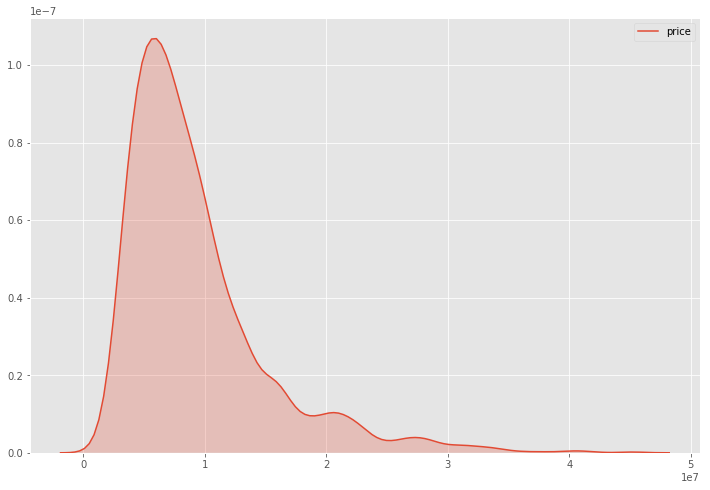

In [37]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.kdeplot(realstate["price"], shade=True, legend = True)

In [38]:
# Check Variance of price
print('Price variance:', realstate.price.var())

Price variance: 33587674713361.086


<div class="alert alert-block alert-info">
Price distribution is right skwed and the variance is very high.
</div>

#### The main aim of data reshaping will be to transform price values to another form with better properties that is more suitable for liner relationship with bathrooms, bedrooms, parking space and property type.

## Task 2.1: Z-Score Standardization

Variance after Z-Score Standardization: 1.000500751126691


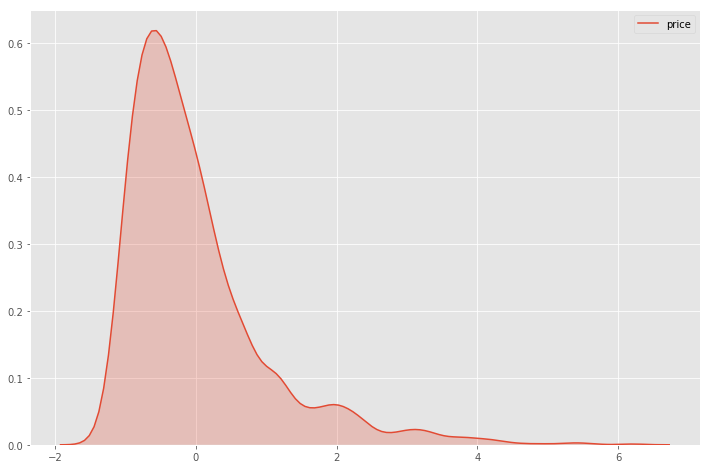

In [39]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(realstate[['price']])
df_std = std_scale.transform(realstate[['price']]) 
realstateZ = pd.DataFrame()
realstateZ['price'] = df_std[:,0]
fig, ax = plt.subplots(figsize=(12,8)) 
sns.kdeplot(realstateZ["price"], shade=True, legend = True)
print('Variance after Z-Score Standardization:', realstateZ.price.var())

<div class="alert alert-block alert-info">
<b>Z-Score Standardization</b> rescales data to have a mean (μ) of 0 and standard deviation (σ) of 1 (unit variance).  The distribution is right skwed.
</div>


### Task 2.1:  MinMax Normalization

Variance after MinMax Normalization: 0.01727433130311315


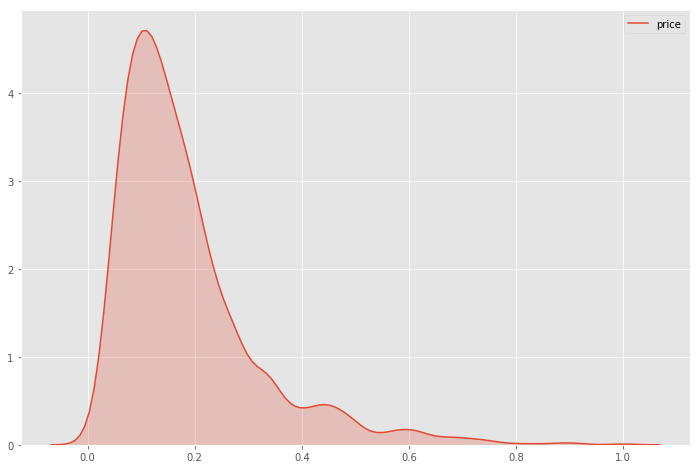

In [40]:
minmax_scale = preprocessing.MinMaxScaler().fit(realstate[['price']])
df_minmax = minmax_scale.transform(realstate[['price']])
df_minmax[0:5]
realstateMinMax = pd.DataFrame()
realstateMinMax['price'] = df_minmax[:,0]
fig, ax = plt.subplots(figsize=(12,8)) 
sns.kdeplot(realstateMinMax["price"], shade=True, legend = True)
print('Variance after MinMax Normalization:', realstateMinMax.price.var())

<div class="alert alert-block alert-info">
<b>MinMax</b> Normalization rescales the values into a range of [0,1].  
However, the outliers from the data set are lost. Again the distribution is right skwed.
</div>

### Task 2.3:  Log Normalization

In [41]:
def log_transformation(x):
    return math.log(x)

Variance after Log Normalization: 0.3084179770823131


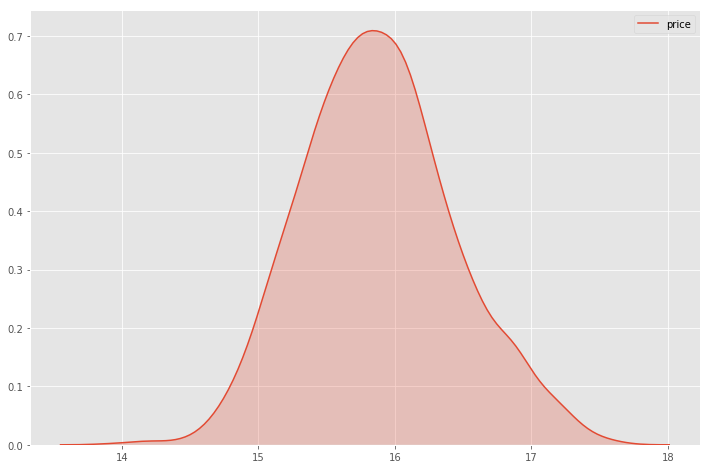

In [42]:
realstateLog = pd.DataFrame()
realstateLog['price'] = realstate['price'].apply(lambda x: log_transformation(x))
fig, ax = plt.subplots(figsize=(12,8)) 
sns.kdeplot(realstateLog["price"], shade=True, legend = True)
print('Variance after Log Normalization:', realstateLog.price.var())

<div class="alert alert-block alert-info">
Log Transformation has decreased the variability of data and conform the data more closely to the normal distribution.
</div>

### Task 2.4:  Power Transformation

In [43]:
def power_transformation(x):
    return math.pow(x,2)

Variance after Power Transformation: 3.2640496942305046e+28


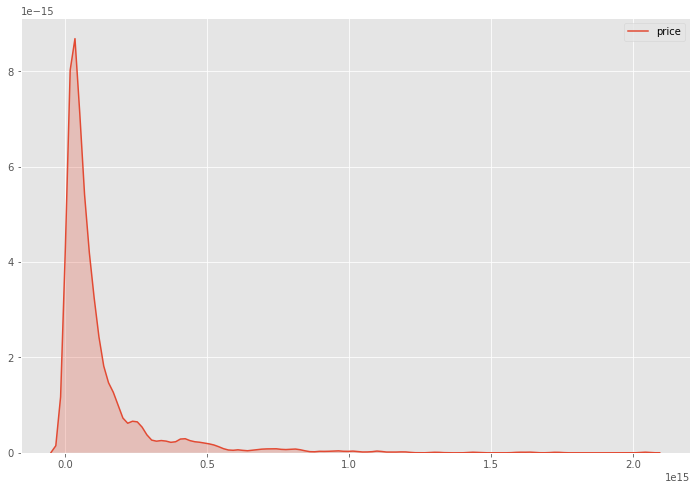

In [44]:
realstatePower = pd.DataFrame()
realstatePower['price'] = realstate['price'].apply(lambda x: power_transformation(x))
fig, ax = plt.subplots(figsize=(12,8)) 
sns.kdeplot(realstatePower["price"], shade=True, legend = True)
print('Variance after Power Transformation:', realstatePower.price.var())

<div class="alert alert-block alert-info">
The Spread of data is increase after power transformation and the data is highly right skwed.
</div>

### Task 2.5:  Squareroot Transformation

In [45]:
def sqroot_transformation(x):
    return math.sqrt(x)

Variance after Squareroot Transformation: 721806.9215341485


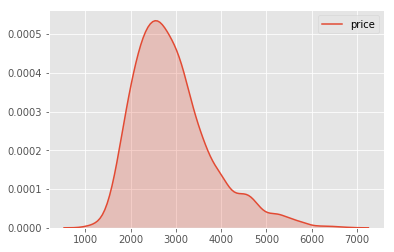

In [46]:
realstatesqRoot = pd.DataFrame()
realstatesqRoot['price'] = realstate['price'].apply(lambda x: sqroot_transformation(x))
sns.kdeplot(realstatesqRoot["price"], shade=True, legend = True)
print('Variance after Squareroot Transformation:', realstatesqRoot.price.var())

<div class="alert alert-block alert-info">
After performing squareroot transformation variance is still high.
</div>

***
We saw that price variable is highly skwed and has very high variancde which is justifiable because price is a physical data.  
After performing various transformation and standardization on price variable we can conclude that <b>Log Transformation</b> on price will be ideal to if we have to build liner model on price using bedroom, bathroom, parking space and property type.  
Log Transformation has reduced right skewness and distribution is normally distributed.  
***

## Linear Regression

In [47]:
# Linear Regression with MinMax
X = realstate[['bedrooms','bathrooms','parking_space']] 

# Select variable to predict
y = realstateLog['price']

# split dataframe into train and test data.
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

# Instiantiate LinearRigression
model = linear_model.LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict Delivery Fare on Test Data
y_predict = model.predict(X_test)


# drone['predFare'] = model.predict(drone[['Drone Type', 'Post Type','Package Weight','Journey Distance']])

# drone['Delivery Fare'] = np.where(drone['Delivery Fare'] != drone['predFare']
#                                  ,drone['predFare']
#                                  ,drone['Delivery Fare'])
# drop predFare from dataframe
# drone.drop('predFare', 1, inplace=True)

print('Delivery Fare predicted with ',model.score(X_test,y_test)*100, '% accuracy')

Delivery Fare predicted with  2.124553150402053 % accuracy


Here we have attempted to predict price with bedrooms, bathrooms and parking_space.  
We are predicting continous variable from categorical variables